In [3]:
teachers = pd.read_csv('../data/teachers.csv')
students = pd.read_csv('../data/students.csv')
sessions = pd.read_csv('../data/sessions.csv')
schools = pd.read_csv('../data/schools.csv')
posts = pd.read_csv('../data/posts.csv')
planning_events = pd.read_csv('../data/planning_events.csv')
child_posts = pd.read_csv('../data/child_posts.csv')
classrooms = pd.read_csv('../data/classrooms.csv')
lesson_posts = pd.read_csv('../data/lesson_posts.csv')
parents = pd.read_csv('../data/parents.csv')
sessions['start_date'] = pd.to_datetime(sessions['start_date'])
sessions['stop_date'] = pd.to_datetime(sessions['stop_date'])
sessions['exists']=1
posts['exists']=1
# posts['date'] = pd.to_datetime(posts.date, errors='coerce')
posts['date'] = pd.to_datetime(posts.date, errors='coerce')

## Sessions analysis

In [2]:
sessions.head()

,id,current,start_date,stop_date,name,school_id,inactive,exists
0,1,f,2012-01-03,2012-06-20,2011-12,2,f,1
1,2,f,2012-06-25,2012-08-17,Summer 2012,2,f,1
2,6,f,2013-09-01,2014-07-01,2013-14,3,f,1
3,3,f,2012-09-04,2013-06-19,2012-13,2,f,1
4,4,f,2012-09-01,2013-06-30,2012-13,3,f,1


In [3]:
# churners:
sum(sessions.groupby('school_id')['stop_date'].max()<pd.to_datetime('april 28, 2018'))

14

In [4]:
sum(sessions['stop_date']<pd.to_datetime('april 28, 2018'))

1973

Text(0.5,1,'school_id start/stop dates')

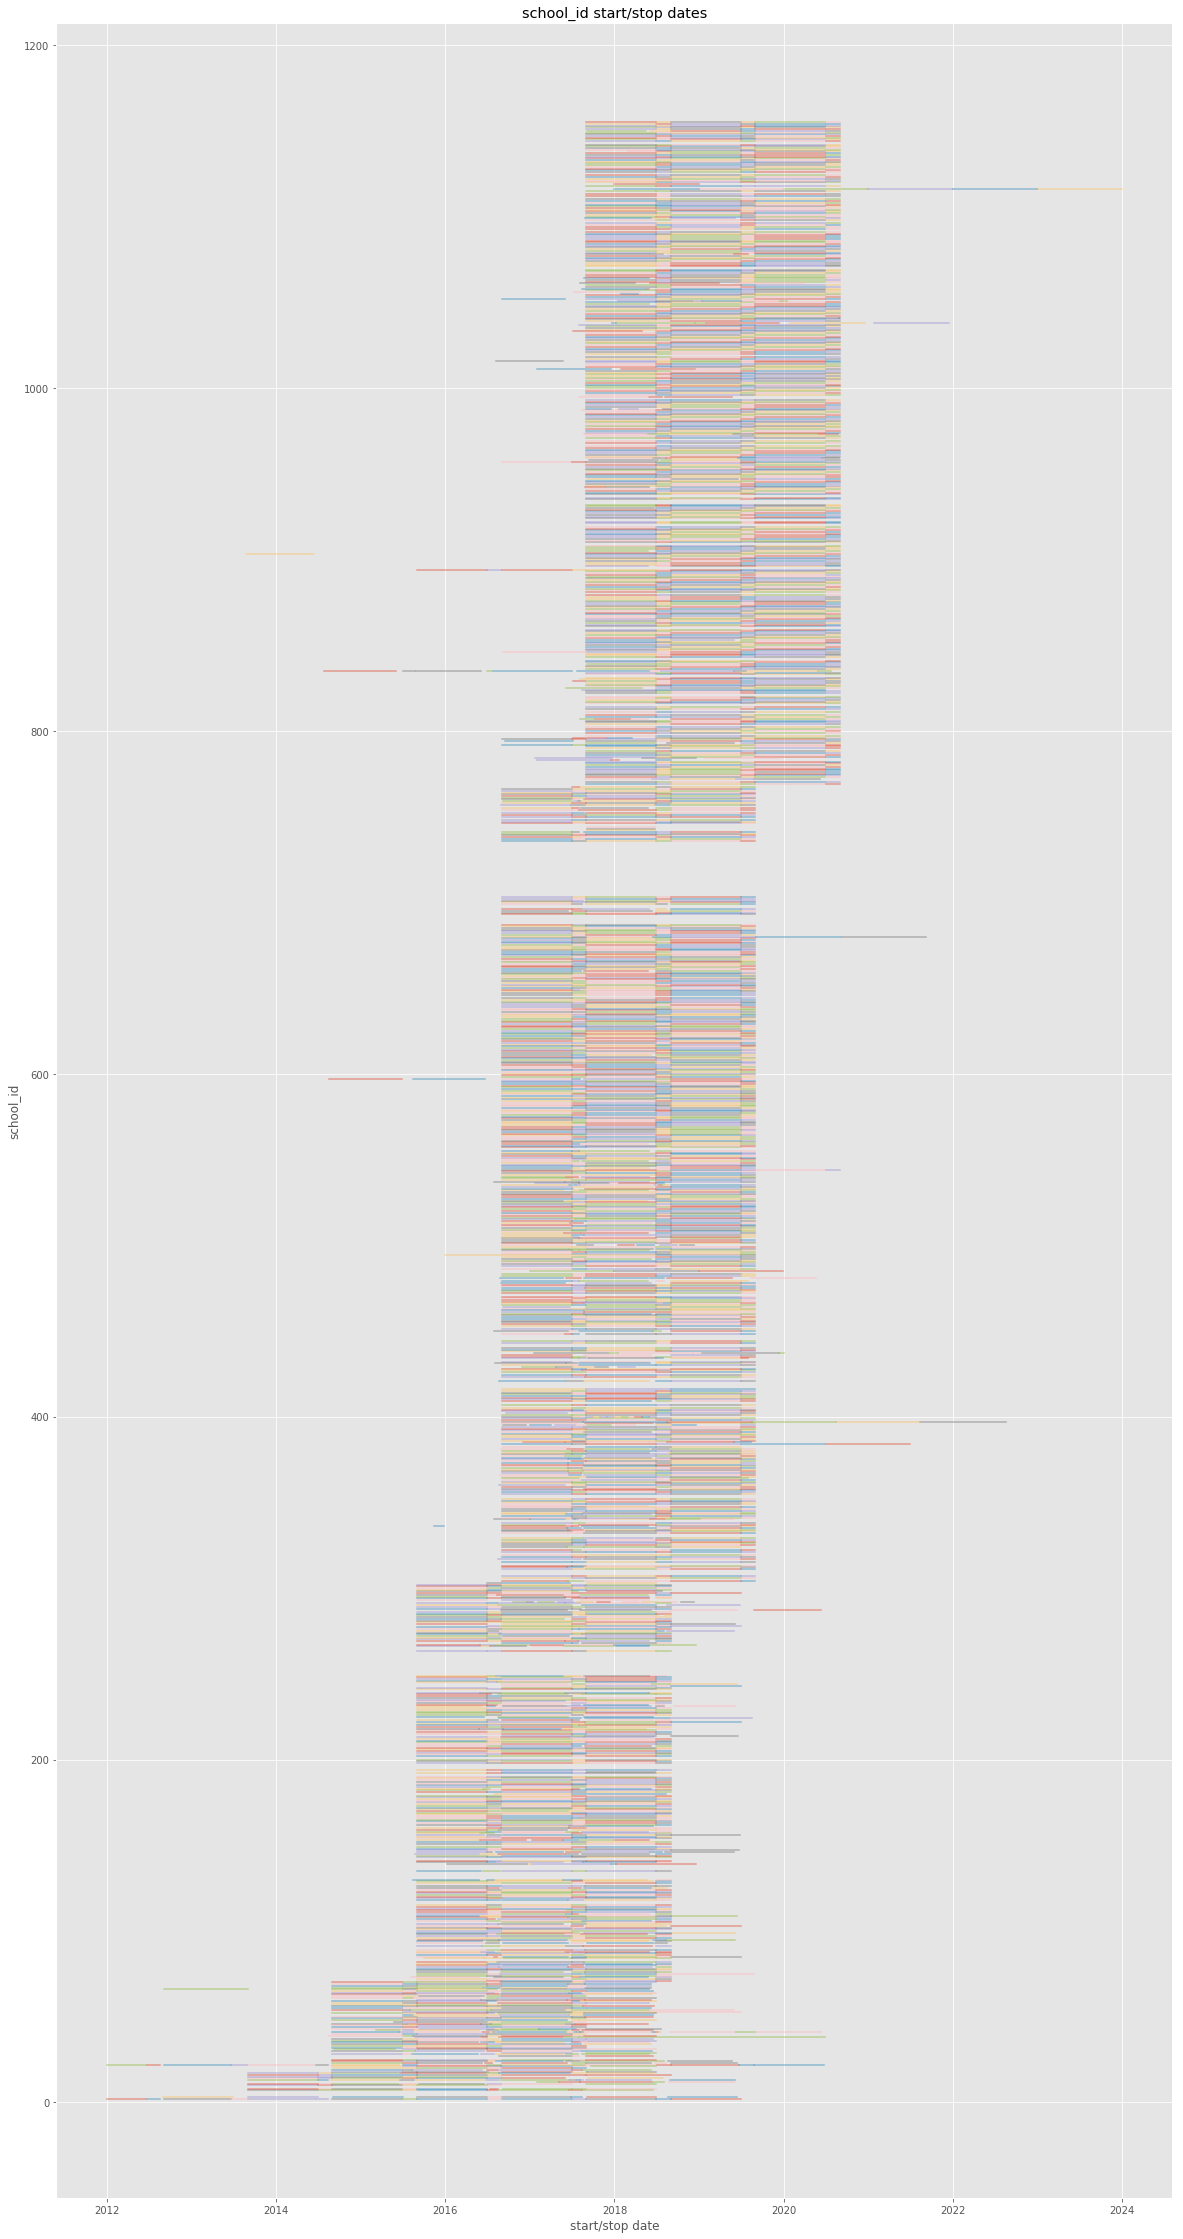

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20,40))
point_pairs = [((sessions.start_date[i],sessions.stop_date[i]),(sessions.school_id[i],sessions.school_id[i])) for i in range(len(sessions))]
# point_pairs = [((sessions.start_date[i],sessions.stop_date[i]),(sessions.school_id[i],sessions.school_id[i])) for i in range(100)]
for x in point_pairs:
    ax.plot(x[0], x[1], alpha=.5)
ax.set_xlabel('start/stop date')
ax.set_ylabel('school_id')
ax.set_title('school_id start/stop dates')

In [6]:
sessions.start_date[0]

Timestamp('2012-01-03 00:00:00')

In [7]:
sessions.groupby('start_date').sum().head(5)
sum_sessions_date_indexed = sessions.groupby('start_date').sum()
sum_sessions_date_indexed['exists'] = np.log(sum_sessions_date_indexed['exists'])
sum_sessions_date_indexed[sum_sessions_date_indexed['school_id']==465]['exists']
sum_sessions = sum_sessions_date_indexed.reset_index()
sum_sessions.head()

,start_date,id,school_id,exists
0,2012-01-03,4596,24,0.693147
1,2012-06-25,4598,24,0.693147
2,2012-09-01,4,3,0.000000
3,2012-09-04,6662,90,1.098612
4,2013-06-20,4606,24,0.693147


max stop = 2023-12-31 00:00:00
max start = 2023-01-01 00:00:00
min stop = 2012-06-20 00:00:00
min start = 2012-01-03 00:00:00


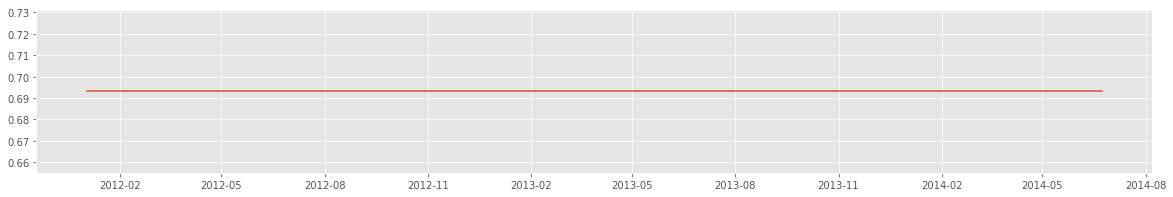

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,3))
ax.plot(sum_sessions[sum_sessions['school_id']==24]['start_date'], sum_sessions[sum_sessions['school_id']==24]['exists'])
sessions.describe()
print('max stop = ' + str(sessions.stop_date.max()))
print('max start = ' + str(sessions.start_date.max()))
print('min stop = ' + str(sessions.stop_date.min()))
print('min start = ' + str(sessions.start_date.min()))

In [9]:
sessions.head(3)

,id,current,start_date,stop_date,name,school_id,inactive,exists
0,1,f,2012-01-03,2012-06-20,2011-12,2,f,1
1,2,f,2012-06-25,2012-08-17,Summer 2012,2,f,1
2,6,f,2013-09-01,2014-07-01,2013-14,3,f,1


school_id
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
22    AxesSubplot(0.125,0.125;0.775x0.755)
Name: exists, dtype: object

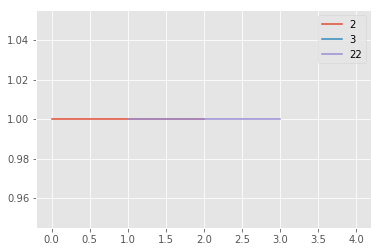

In [10]:
sessions_grouped = sessions[['start_date','school_id','exists']].groupby(['start_date','school_id']).sum().reset_index().head()
# sessions_grouped.set_index('start_date', inplace=True)
sessions_grouped.groupby('school_id')['exists'].plot(legend=True)

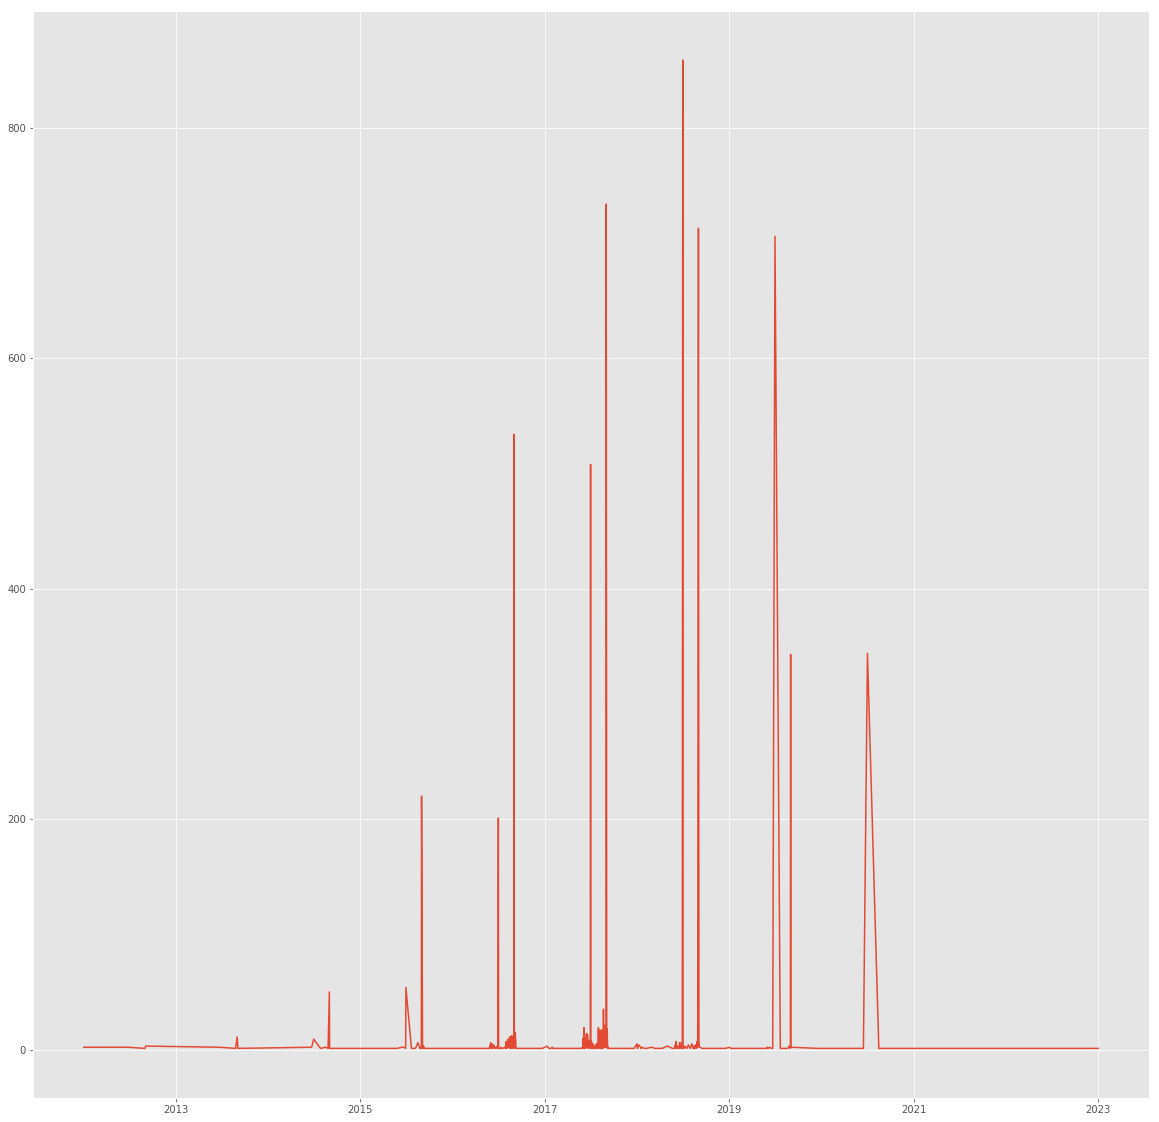

In [11]:
fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.plot(sessions[['exists','start_date']].groupby('start_date').sum());

## Posts analysis

In [128]:
posts.head(3)

,id,date,classroom_id,picture_file_name,private,exists
0,4319418,2018-01-25,1684,NaN,f,1
1,4319419,2018-01-25,1684,NaN,f,1
2,4319420,2018-01-25,1684,NaN,f,1


In [13]:
posts.describe()

,id,classroom_id,exists
count,4.584013e+06,4.584013e+06,4584013.0
mean,2.551726e+06,1.250037e+03,1.0
std,1.469805e+06,9.544487e+02,0.0
min,6.000000e+00,1.000000e+00,1.0
25%,1.264436e+06,4.980000e+02,1.0
50%,2.567237e+06,9.850000e+02,1.0
75%,3.826450e+06,1.902000e+03,1.0
max,5.088035e+06,3.862000e+03,1.0


In [14]:
sorted_post_date = posts.date.sort_values()

In [15]:
# # posts.date.dtypes
# # posts.date.apply(lambda x: not isinstance(x, pd.Timestamp))
# sorted_post_date.iloc[-170:]
# # posts.date.dtypes
# posts['date'] = pd.to_datetime(posts.date, errors='coerce')
# # len(posts.date)
# # posts.date>'2018-12-12'

In [16]:
print(posts.date.max())
print(posts.date.min())

2020-08-24 00:00:00
1908-10-09 00:00:00


In [17]:
# posts['exists']=1
# posts.head(3)

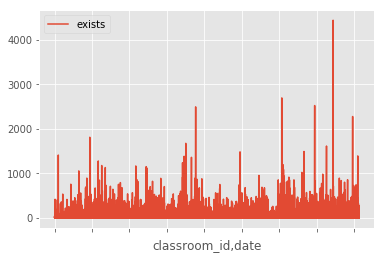

In [94]:
posts[['date','classroom_id','exists']].groupby(['classroom_id', 'date']).sum().plot();

In [96]:
posts[['date','classroom_id','exists']].groupby(['classroom_id', 'date']).sum()

exists
classroom_id date              
1            2011-12-25      16
             2012-01-05      25
             2012-01-06      16
             2012-01-12      16
             2012-01-13      22
             2012-01-14       9
             2012-01-17       7
             2012-01-25      17
             2012-01-26       7
             2012-01-27      43
             2012-01-30       4
             2012-01-31       1
             2012-02-01       6
             2012-02-03       4
             2012-02-04       3
             2012-02-06      33
             2012-02-07      10
             2012-02-08       5
             2012-02-09      42
             2012-02-10       7
             2012-02-11       3
             2012-02-13       9
             2012-02-14      12
             2012-02-15      10
             2012-02-16      13
             2012-02-17       2
             2012-02-21       8
             2012-02-22      19
             2012-02-23       3
             2012-02-24      13
...                         ...
3836         2018-02-20       3
             2018-02-22       1
             2018-02-28       1
             2018-03-08       1
             2018-03-09       2
             2018-03-12       4
             2018-03-13       1
             2018-03-16      39
3837         2018-03-13       5
3838         2018-03-13      85
             2018-03-14      79
             2018-03-16      66
             2018-03-17      69
3840         2018-03-12      23
3843         2017-11-21       9
             2017-11-28       6
             2017-11-29       3
             2018-01-26       5
             2018-02-15       3
             2018-02-16      12
             2018-03-13     222
             2018-03-14     146
             2018-03-15      66
3849         2018-03-15      28
             2018-03-16      23
3859         2018-03-15       5
             2018-03-16       1
3860         2018-03-15      16
             2018-03-16       2
3862         2018-03-15       1

[203159 rows x 1 columns]

In [95]:
sum_post = posts[['date','classroom_id','exists']].groupby(['classroom_id', 'date']).sum()
sum_post['exists'] = np.log(sum_post['exists'])
sum_post = sum_post.reset_index()
sum_post_date_indexed = sum_post.copy()
sum_post_date_indexed.set_index('date',inplace=True)
# plt.plot(sum_post[sum_post['classroom_id']==1])
# plt.scatter(sum_post[sum_post['classroom_id']==1][date], sum_post[sum_post['classroom_id']==1]['exists'])

In [ ]:
sum_post[sum_post['classroom_id']==3]

In [ ]:
sum_post['classroom_id'].value_counts()[60:61]
sum_post.head()

In [ ]:
# plt.plot(sum_post[sum_post['classroom_id']==1]);
np.exp(5)

Text(0.5,1,'Class 77 log(posts)')

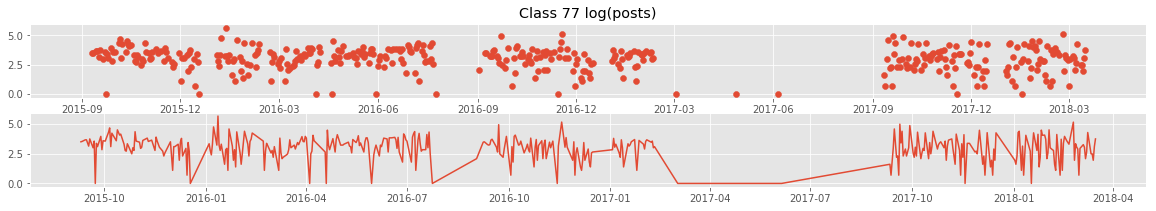

In [111]:
fig, ax = plt.subplots(2,1, figsize=(20,3))
ax[0].scatter(sum_post[sum_post['classroom_id']==77]['date'].values,sum_post[sum_post['classroom_id']==77]['exists'])
ax[1].plot(sum_post[sum_post['classroom_id']==77]['date'],sum_post[sum_post['classroom_id']==77]['exists']);
ax[0].set_title("Class 77 log(posts)")

Text(0.5,1,'Class 852 log(posts)')

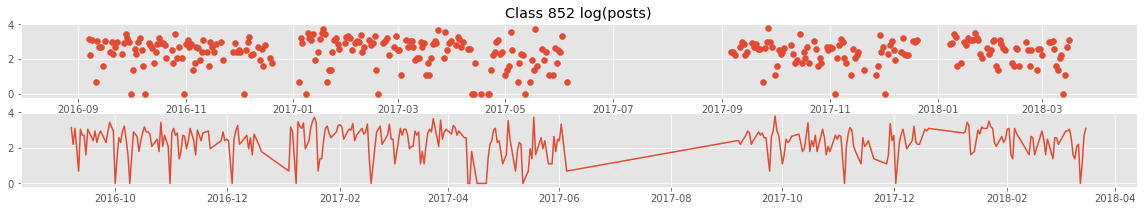

In [112]:
fig, ax = plt.subplots(2,1, figsize=(20,3))
ax[0].scatter(sum_post[sum_post['classroom_id']==852]['date'].values,sum_post[sum_post['classroom_id']==852]['exists'])
ax[1].plot(sum_post[sum_post['classroom_id']==852]['date'],sum_post[sum_post['classroom_id']==852]['exists']);
ax[0].set_title("Class 852 log(posts)")

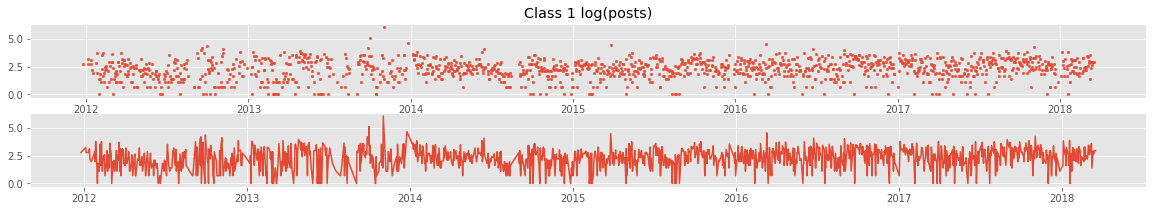

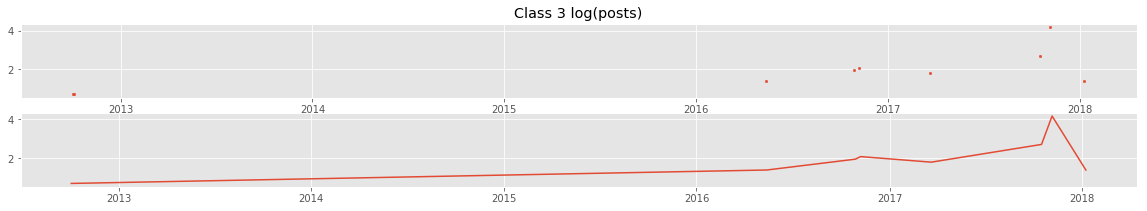

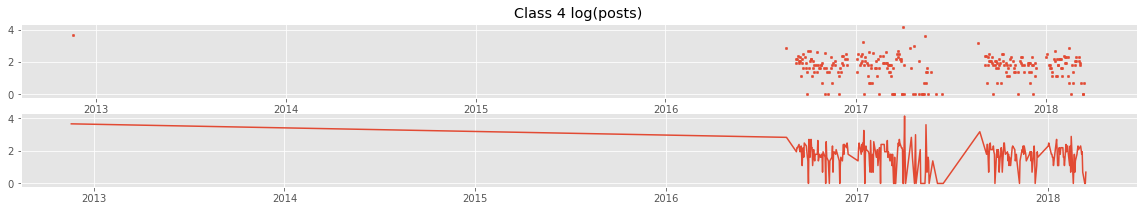

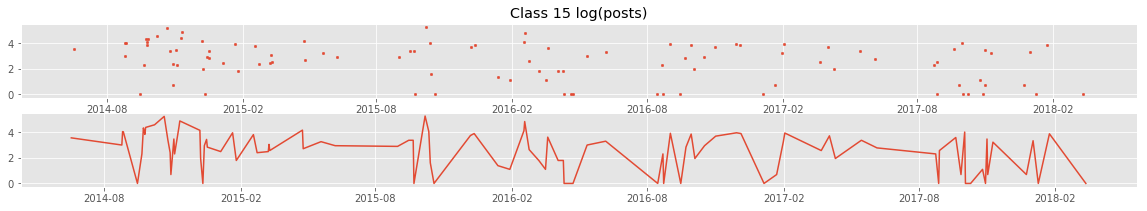

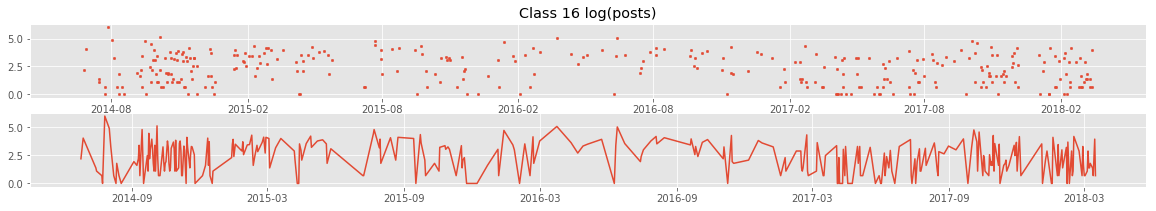

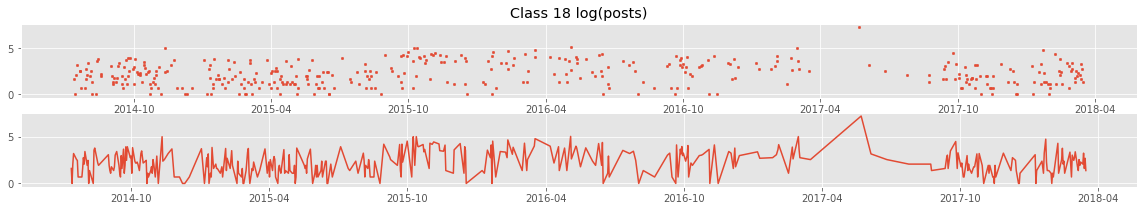

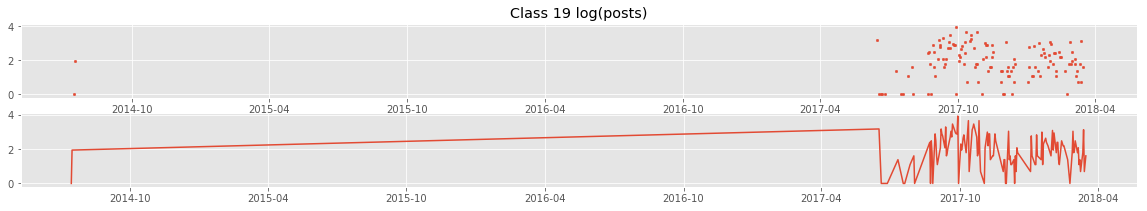

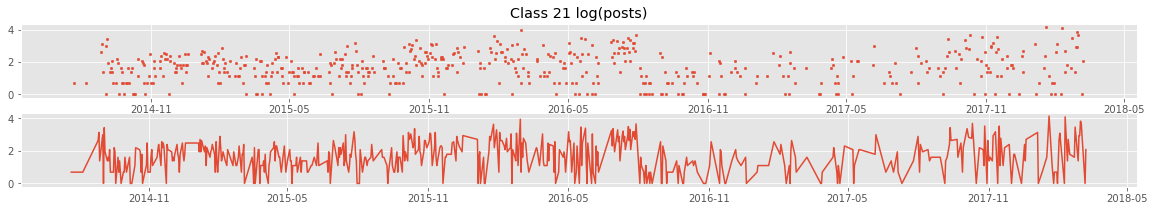

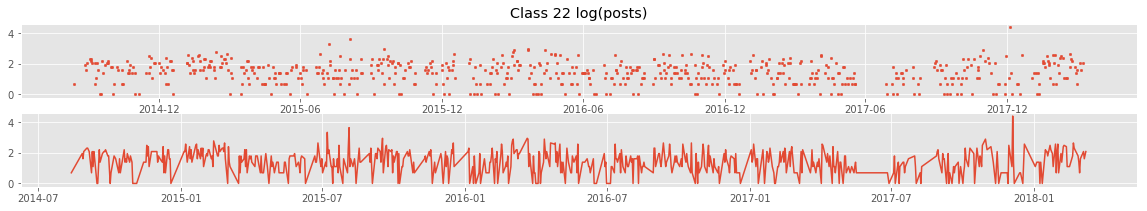

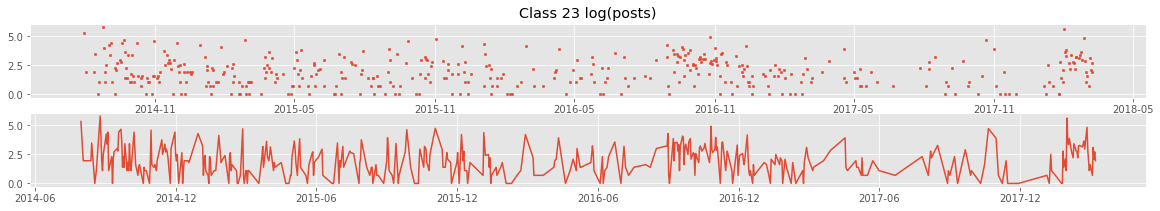

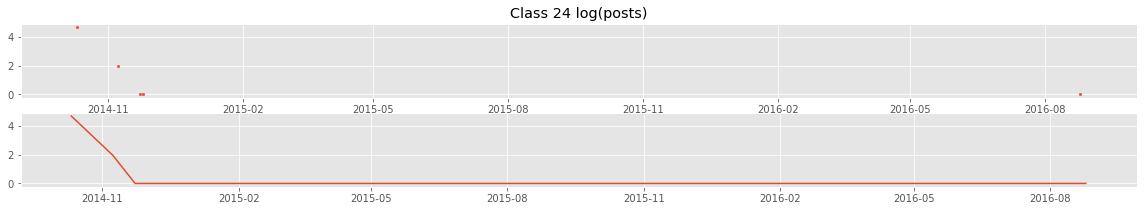

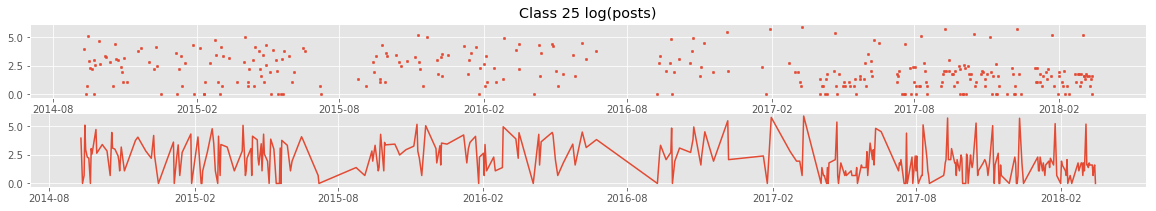

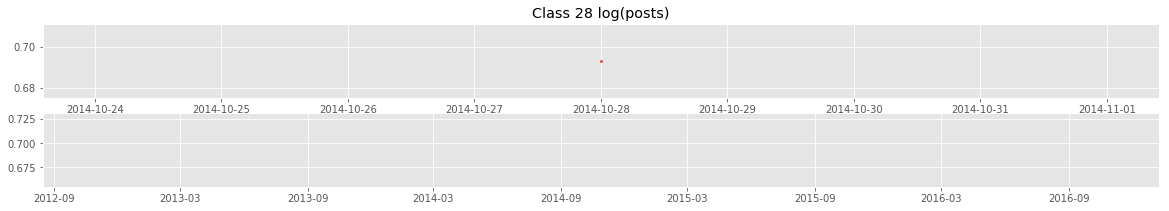

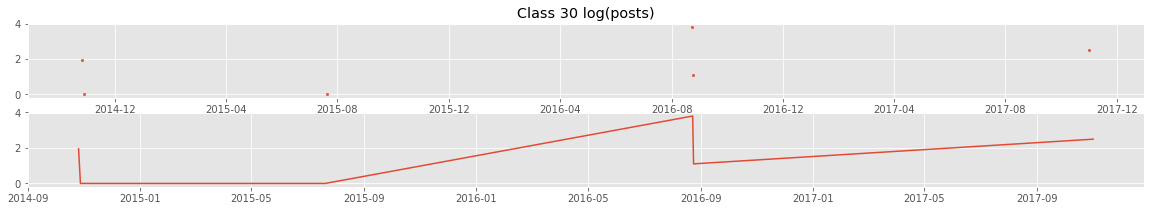

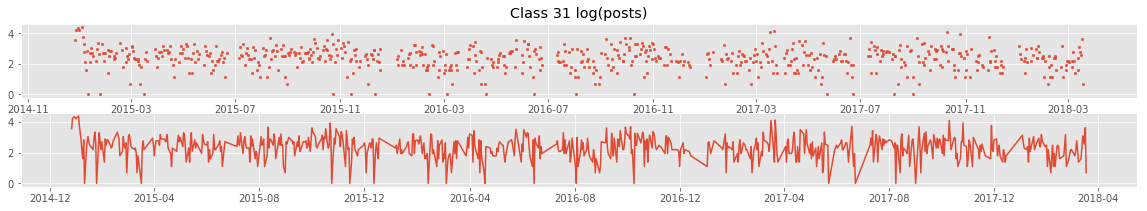

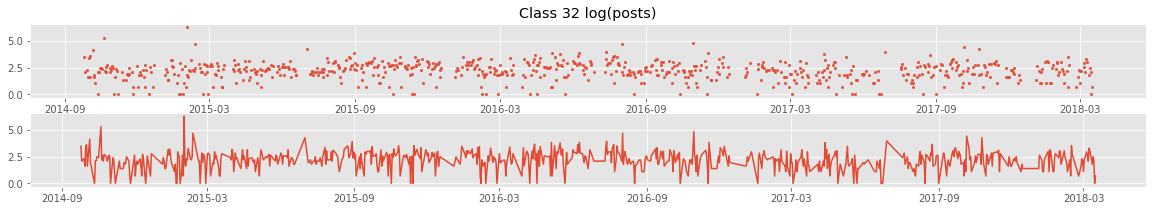

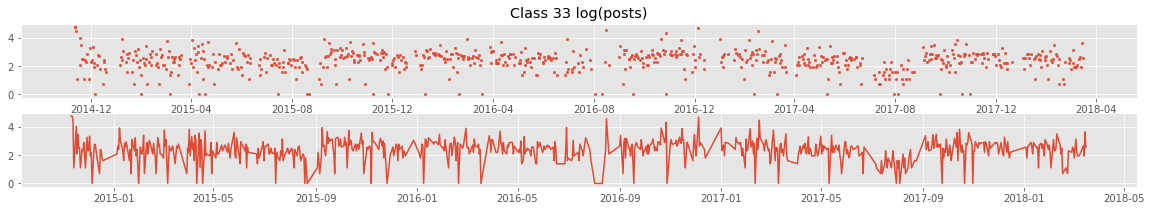

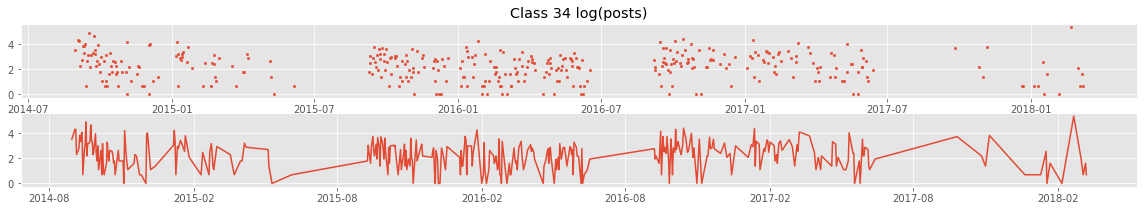

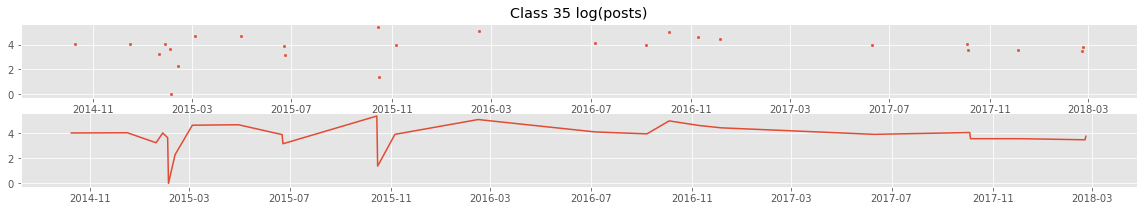

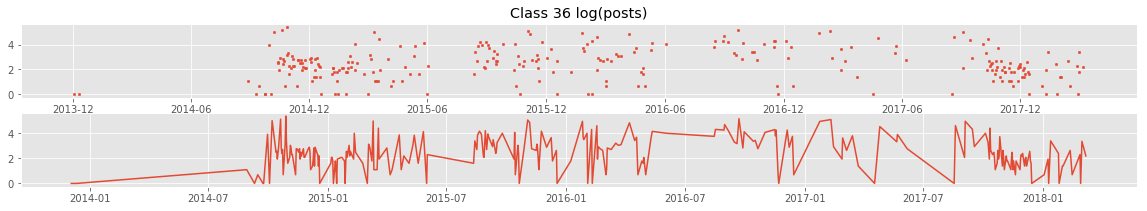

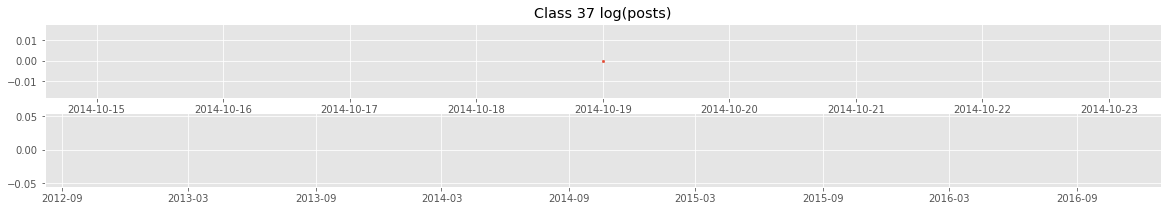

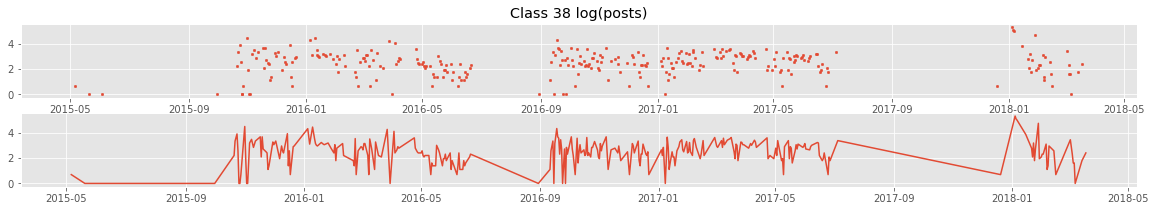

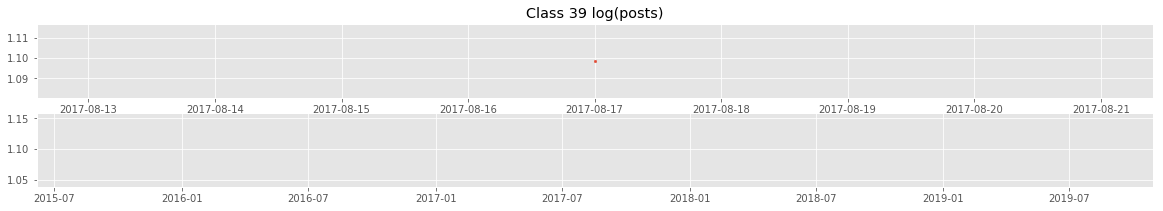

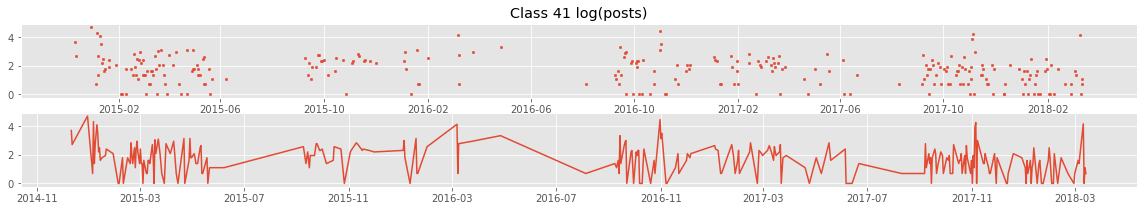

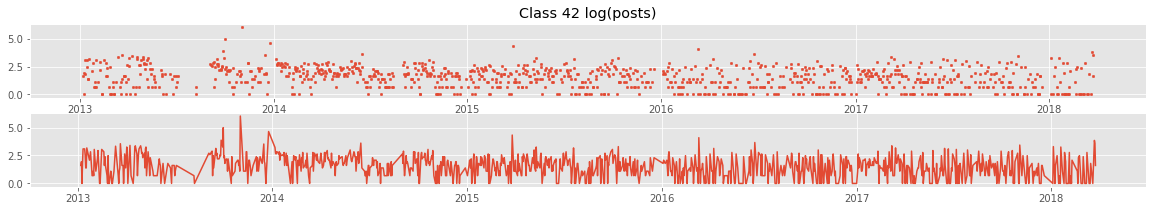

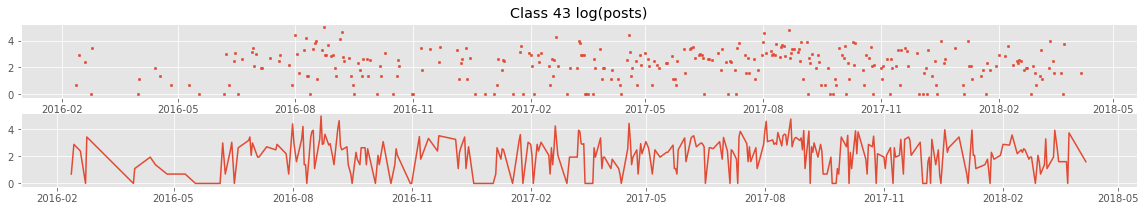

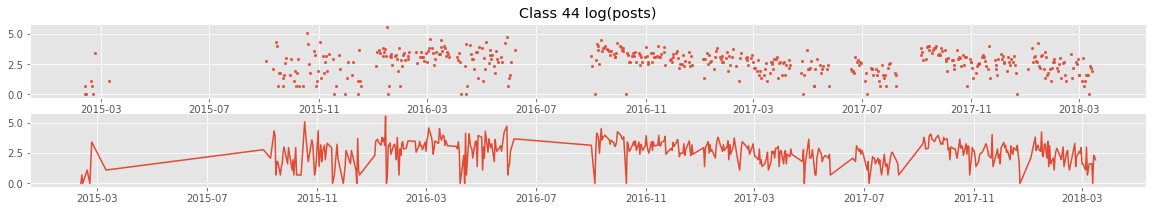

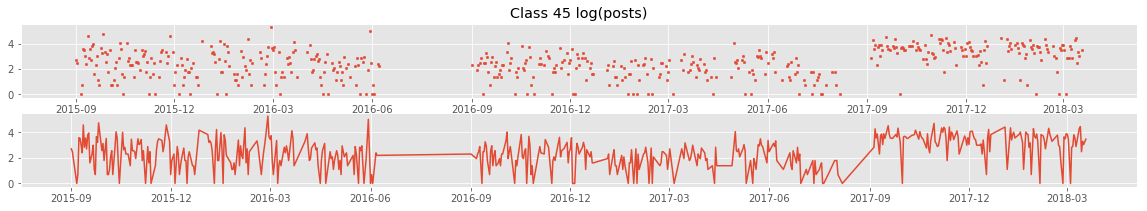

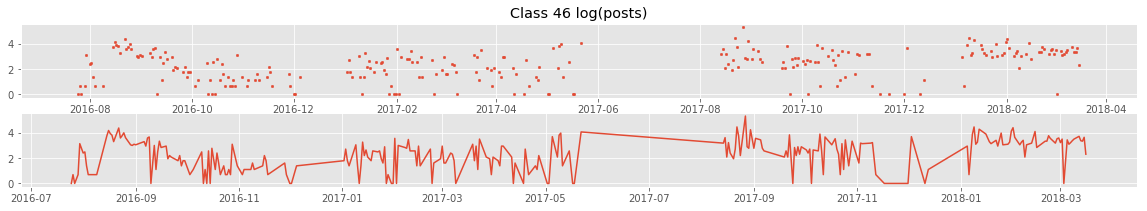

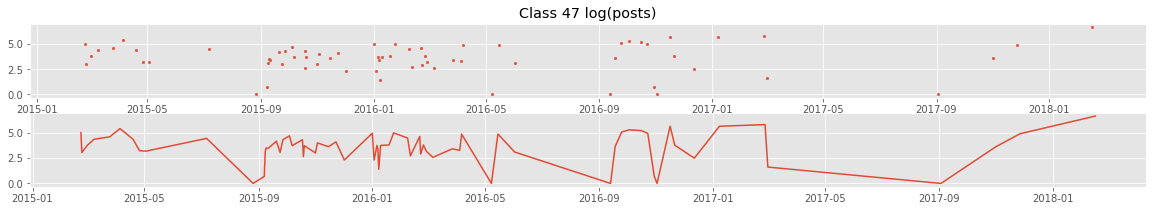

In [113]:
for classroom_id in sum_post['classroom_id'].unique()[0:30]:
    fig, ax = plt.subplots(2,1, figsize=(20,3))
    ax[0].scatter(sum_post[sum_post['classroom_id']==classroom_id]['date'].values,sum_post[sum_post['classroom_id']==classroom_id]['exists'], s=6)
    ax[1].plot(sum_post[sum_post['classroom_id']==classroom_id]['date'],sum_post[sum_post['classroom_id']==classroom_id]['exists']);
    ax[0].set_title(f"Class {classroom_id} log(posts)")
    plt.show()

## Peek at all data:

In [179]:
posts.head(3)

,id,date,classroom_id,picture_file_name,private,exists
0,4319418,2018-01-25,1684,NaN,f,1
1,4319419,2018-01-25,1684,NaN,f,1
2,4319420,2018-01-25,1684,NaN,f,1


In [183]:
planning_events.head(10)

,classroom_id,child_id,lesson_id,event_type,created_at,created_by_id
0,1,4,551,plan,2014-01-08 04:11:55.625921,NaN
1,1,4,544,plan,2014-01-08 04:11:55.625921,NaN
2,1,4,538,plan,2014-01-08 04:11:55.625921,NaN
3,1,4,518,plan,2014-01-08 04:11:55.625921,NaN
4,1,4,31,plan,2014-01-08 04:11:55.625921,NaN
5,1,4,46,plan,2014-01-08 04:11:55.625921,NaN
6,1,12,551,plan,2014-01-08 04:11:55.625921,NaN
7,1,12,544,plan,2014-01-08 04:11:55.625921,NaN
8,1,12,536,plan,2014-01-08 04:11:55.625921,NaN
9,1,12,538,plan,2014-01-08 04:11:55.625921,NaN


In [178]:
classrooms.head(3)

,id,school_id,lesson_set_id,inactive,classroom_type
0,2650,855,1281,f,Primary
1,174,48,126,t,Primary
2,2645,862,1276,f,Lower Elementary


In [184]:
len(classrooms.id.unique())

3643

In [129]:
teachers.head(3)

,id,school_id,default_classroom_id,teacher,admin
0,830,22,42.0,t,t
1,445,14,NaN,f,t
2,48093,1121,3739.0,t,t


In [186]:
len(teachers.id.unique())

6622

In [190]:
sum(teachers.default_classroom_id.isna())

1354

In [192]:
sum(teachers.teacher=='f')

677

In [187]:
len(teachers.default_classroom_id.unique())

2761

In [193]:
students.head()

,child_id,classroom_id,current
0,997,72,f
1,13,1,f
2,2221,55,f
3,32489,1466,t
4,8388,60,f


In [188]:
schools.head(5)

,id
0,2
1,3
2,7
3,8
4,10


In [199]:
lesson_posts.head(3)

,lesson_id,post_id
0,17689,472955
1,17690,472955
2,17737,472955


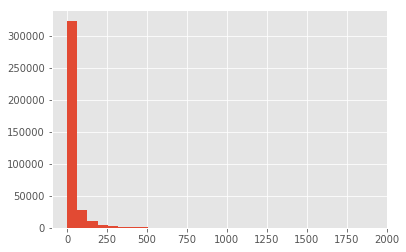

In [200]:
plt.hist(lesson_posts.groupby('lesson_id').count()['post_id'], bins=30);

In [201]:
lesson_posts.groupby('lesson_id').count()['post_id'].describe()

count    376224.000000
mean         36.306934
std          74.956954
min           1.000000
25%           4.000000
50%          13.000000
75%          34.000000
max        1906.000000
Name: post_id, dtype: float64

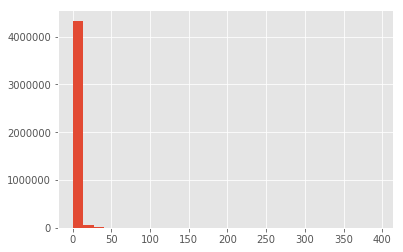

In [202]:
plt.hist(lesson_posts.groupby('post_id').count()['lesson_id'], bins=30);

In [203]:
child_posts.head(3)

,child_id,post_id
0,17689,472955
1,17690,472955
2,17737,472955


## Combine data into one dataframe for analysis:

In [222]:
posts = pd.read_csv('../data/posts.csv')
posts['exists']=1
posts['date'] = pd.to_datetime(posts.date, errors='coerce')

In [223]:
print(len(posts))
posts.head()

4584013


,id,date,classroom_id,picture_file_name,private,exists
0,4319418,2018-01-25,1684,NaN,f,1
1,4319419,2018-01-25,1684,NaN,f,1
2,4319420,2018-01-25,1684,NaN,f,1
3,4319421,2018-01-25,1684,NaN,f,1
4,4319422,2018-01-25,1684,NaN,f,1


In [224]:
classrooms_merged = classrooms.merge(posts,how='outer', left_on='id', right_on='classroom_id')
classrooms_merged['classroom_id']=classrooms_merged['id_x']
classrooms_merged = classrooms_merged.drop('id_x', axis=1)
classrooms_merged['post_id']=classrooms_merged['id_y']
classrooms_merged = classrooms_merged.drop('id_y', axis=1)
print(len(classrooms_merged))
classrooms_merged.head(3)

4585066


,school_id,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id
0,855,1281,f,Primary,NaT,2650,NaN,NaN,NaN,NaN
1,48,126,t,Primary,2015-09-16,174,NaN,f,1.0,89168.0
2,48,126,t,Primary,2015-10-08,174,NaN,f,1.0,118933.0


In [225]:
children_per_post = child_posts.groupby('post_id').count()
children_per_post.describe()
children_per_post = children_per_post.reset_index()
children_per_post['children_per_post_aka_post_blast'] = children_per_post['child_id']
children_per_post = children_per_post.drop('child_id', axis=1)
children_per_post.head(3)

,post_id,children_per_post_aka_post_blast
0,6,2
1,7,1
2,10,1


In [226]:
classrooms_merged = classrooms_merged.merge(children_per_post, how='left', left_on='post_id', right_on='post_id')
print(len(classrooms_merged))
classrooms_merged.head(3)

4585066


,school_id,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id,children_per_post_aka_post_blast
0,855,1281,f,Primary,NaT,2650,NaN,NaN,NaN,NaN,NaN
1,48,126,t,Primary,2015-09-16,174,NaN,f,1.0,89168,NaN
2,48,126,t,Primary,2015-10-08,174,NaN,f,1.0,118933,2.0


In [227]:
# not adding
posts_per_child = child_posts.groupby('child_id').count()
posts_per_child.describe()
posts_per_child.head(3)

,post_id
child_id,
1,172
2,132
4,899


In [228]:
posts_per_lesson = lesson_posts.groupby('lesson_id').count()
posts_per_lesson
print(len(posts_per_lesson))
posts_per_lesson = posts_per_lesson.reset_index()
posts_per_lesson['post_per_lesson_aka_popularity'] = posts_per_lesson['post_id']
posts_per_lesson = posts_per_lesson.drop('post_id', axis=1)
posts_per_lesson.head(3)


376224


,lesson_id,post_per_lesson_aka_popularity
0,1,172
1,2,132
2,4,899


In [229]:
classrooms_merged = classrooms_merged.merge(posts_per_lesson, how='left', left_on='lesson_set_id', right_on='lesson_id')
print(len(classrooms_merged))
classrooms_merged.head(3)

4585066


,school_id,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id,children_per_post_aka_post_blast,lesson_id,post_per_lesson_aka_popularity
0,855,1281,f,Primary,NaT,2650,NaN,NaN,NaN,NaN,NaN,1281.0,18.0
1,48,126,t,Primary,2015-09-16,174,NaN,f,1.0,89168,NaN,126.0,78.0
2,48,126,t,Primary,2015-10-08,174,NaN,f,1.0,118933,2.0,126.0,78.0


In [230]:
classrooms.head(3)

,id,school_id,lesson_set_id,inactive,classroom_type
0,2650,855,1281,f,Primary
1,174,48,126,t,Primary
2,2645,862,1276,f,Lower Elementary


In [231]:
len(classrooms_merged.classroom_id.unique())

3643

In [232]:
len(teachers.default_classroom_id.unique())
len(teachers)

6622

In [233]:
len(teachers.school_id.unique())

729

376224


,posts_per_lesson
lesson_id,
1,172
2,132
4,899
6,26
8,152
10,1
11,1
12,645
13,864


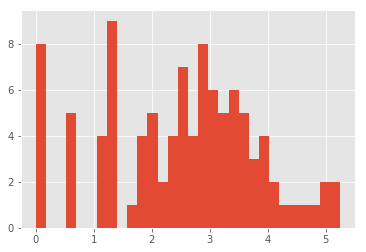

In [234]:
len(lesson_posts.lesson_id.unique())
len(lesson_posts.post_id.unique())
posts_per_lesson = lesson_posts.groupby('lesson_id').count()
print(len(posts_per_lesson))
plt.hist(np.log(posts_per_lesson.sample(100).values), bins=30);
posts_per_lesson.head(3)
posts_per_lesson.rename(index=str, columns={"post_id": "posts_per_lesson"});

In [235]:
classrooms_merged = classrooms_merged.merge(posts_per_lesson, left_on='lesson_set_id', right_index=True)
classrooms_merged.head(3)

,school_id,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id_x,children_per_post_aka_post_blast,lesson_id,post_per_lesson_aka_popularity,post_id_y
0,855,1281,f,Primary,NaT,2650,NaN,NaN,NaN,NaN,NaN,1281.0,18.0,18
3340262,855,1281,f,Primary,NaT,2649,NaN,NaN,NaN,NaN,NaN,1281.0,18.0,18
1,48,126,t,Primary,2015-09-16,174,NaN,f,1.0,89168,NaN,126.0,78.0,78


In [236]:
# next time try merging first, then filter by time, then groupby and count
# We're going to have to merge by time soon.

In [237]:
classrooms_merged = classrooms_merged.merge(teachers, left_on='classroom_id', right_on='default_classroom_id')

In [238]:
teachers['teach_and_admin'] = (teachers['teacher']=='t') & (teachers['admin']=='t' )
teachers['is_teacher'] = teachers['teacher']=='t'
teachers['is_admin'] = teachers['admin']=='t'

In [239]:
teachers_per_class = teachers.groupby('default_classroom_id').sum()
teachers_per_class.head(3)

,id,school_id,teach_and_admin,is_teacher,is_admin
default_classroom_id,,,,,
1.0,252293,34,3.0,17.0,3.0
3.0,68,3,0.0,1.0,0.0
4.0,36555,9,0.0,2.0,1.0


In [240]:
# THIS IS ALMOST DEFINITELY DATA LEAKAGE:
classrooms_merged = classrooms_merged.merge(teachers, left_on='classroom_id', right_index=True)

In [241]:
students.head()

,child_id,classroom_id,current
0,997,72,f
1,13,1,f
2,2221,55,f
3,32489,1466,t
4,8388,60,f


In [242]:
len(students.child_id.unique())

59676

In [243]:
len(students.classroom_id.unique())

3066

In [244]:
current_students_per_class = students[students['current']=='t'].groupby('classroom_id').count()
current_students_per_class.drop('current', axis=1)
current_students_per_class.rename({'child_id': 'num_current_children'});

In [245]:
old_students_per_class = students[students['current']=='f'].groupby('classroom_id').count()
old_students_per_class.drop('current', axis=1)
old_students_per_class.rename({'child_id': 'num_old_children'});

In [246]:
classrooms_merged = classrooms_merged.merge(current_students_per_class, left_on='classroom_id', right_index=True)
classrooms_merged = classrooms_merged.merge(old_students_per_class, left_on='classroom_id', right_index=True)

In [247]:
classrooms_merged

,school_id_x,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id_x,...,default_classroom_id_y,teacher_y,admin_y,teach_and_admin_y,is_teacher_y,is_admin_y,child_id_x,current_x,child_id_y,current_y
2,48,126,f,Primary,2017-01-13,172,NaN,f,1.0,1.18005e+06,...,2479.0,t,f,False,True,False,27,27,38,38
3,48,126,f,Primary,2017-01-13,172,NaN,f,1.0,1.18005e+06,...,2479.0,t,f,False,True,False,27,27,38,38
4,48,126,f,Primary,2016-02-13,172,NaN,f,1.0,262186,...,2479.0,t,f,False,True,False,27,27,38,38
5,48,126,f,Primary,2016-02-13,172,NaN,f,1.0,262186,...,2479.0,t,f,False,True,False,27,27,38,38
6,48,126,f,Primary,2015-08-28,172,NaN,f,1.0,68561,...,2479.0,t,f,False,True,False,27,27,38,38
7,48,126,f,Primary,2015-08-28,172,NaN,f,1.0,68561,...,2479.0,t,f,False,True,False,27,27,38,38
8,48,126,f,Primary,2016-01-29,172,NaN,f,1.0,243499,...,2479.0,t,f,False,True,False,27,27,38,38
9,48,126,f,Primary,2016-01-29,172,NaN,f,1.0,243499,...,2479.0,t,f,False,True,False,27,27,38,38
10,48,126,f,Primary,2015-08-28,172,NaN,f,1.0,68562,...,2479.0,t,f,False,True,False,27,27,38,38
11,48,126,f,Primary,2015-08-28,172,NaN,f,1.0,68562,...,2479.0,t,f,False,True,False,27,27,38,38


### NOT MERGED:

In [ ]:
posts_merge = posts_merge.merge(students, how='left', left_on='child_id', right_on='child_id')
posts_merge.head(3)

In [ ]:
posts_merge.current_student = posts_merge.current
posts_merge.drop('current', axis=1)
posts_merge.head(3)

In [ ]:
posts_merge = posts_merge.merge(planning_events, how='left', left_on)
posts_merge.head(3)

## Combine planning_events into one dataframe for analysis:

In [79]:
planning_events.created_at = pd.to_datetime(planning_events.created_at)

In [80]:
planning_events['created_at'].apply(lambda x: isinstance(x, pd.Timestamp))

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
           ... 
5430276    True
5430277    True
5430278    True
5430279    True
5430280    True
5430281    True
5430282    True
5430283    True
5430284    True
5430285    True
5430286    True
5430287    True
5430288    True
5430289    True
5430290    True
5430291    True
5430292    True
5430293    True
5430294    True
5430295    True
5430296    True
5430297    True
5430298    True
5430299    True
5430300    True
5430301    True
5430302    True
5430303    True
5430304    True
5430305    True
Name: created_at, Length

In [81]:
planning_events

,classroom_id,child_id,lesson_id,event_type,created_at,created_by_id
0,1,4,551,plan,2014-01-08 04:11:55.625921,NaN
1,1,4,544,plan,2014-01-08 04:11:55.625921,NaN
2,1,4,538,plan,2014-01-08 04:11:55.625921,NaN
3,1,4,518,plan,2014-01-08 04:11:55.625921,NaN
4,1,4,31,plan,2014-01-08 04:11:55.625921,NaN
5,1,4,46,plan,2014-01-08 04:11:55.625921,NaN
6,1,12,551,plan,2014-01-08 04:11:55.625921,NaN
7,1,12,544,plan,2014-01-08 04:11:55.625921,NaN
8,1,12,536,plan,2014-01-08 04:11:55.625921,NaN
9,1,12,538,plan,2014-01-08 04:11:55.625921,NaN


## Make hist of posts in last 30 days

In [82]:
posts.head(3)

,id,date,classroom_id,picture_file_name,private,exists,year_month
0,4319418,2018-01-25,1684,NaN,f,1,2018-01-01
1,4319419,2018-01-25,1684,NaN,f,1,2018-01-01
2,4319420,2018-01-25,1684,NaN,f,1,2018-01-01


In [83]:
plt.hist(np.log(num_posts_by_class['exists']), bins=100);

NameError: name 'num_posts_by_class' is not defined

In [ ]:
plt.hist(num_posts_by_class)

### Num posts in the last X days

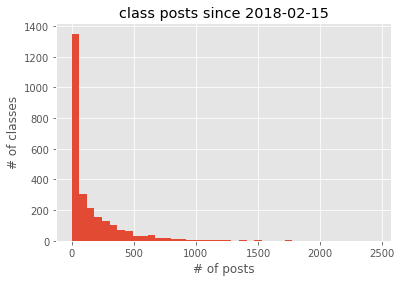

In [85]:
def posts_since(posts,date):
    last_month_posts = posts[posts['date']>date].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'class posts since {date.date()}')
    ax.hist(last_month_posts_total['exists_last_month_posts'],bins=40)
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of posts")
    plt.show()
    
def log_posts_since(posts,date):
    last_month_posts = posts[posts['date']>date].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'class log(posts) since {date.date()}')
    ax.hist(np.log(last_month_posts_total['exists_last_month_posts']+1),bins=40)
    ax.set_ylabel("# of classes")
    ax.set_xlabel("log(#) of posts")
    plt.show()
posts_since(posts, pd.to_datetime("Feb 15 2018"))

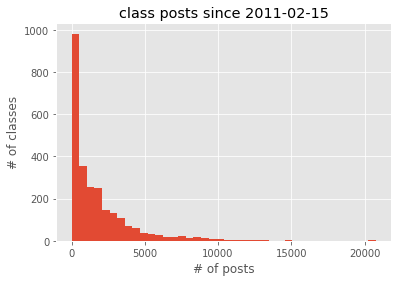

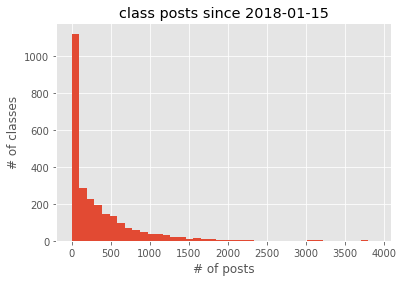

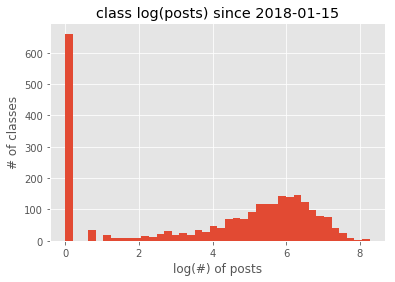

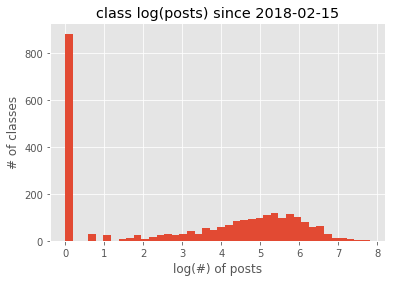

In [86]:
posts_since(posts, pd.to_datetime("Feb 15 2011"))
posts_since(posts, pd.to_datetime("Jan 15 2018"))
log_posts_since(posts, pd.to_datetime("jan 15 2018"))
log_posts_since(posts, pd.to_datetime("feb 15 2018"))

429215


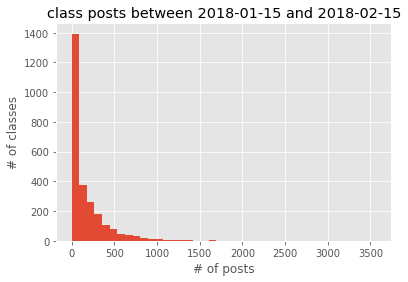

220258


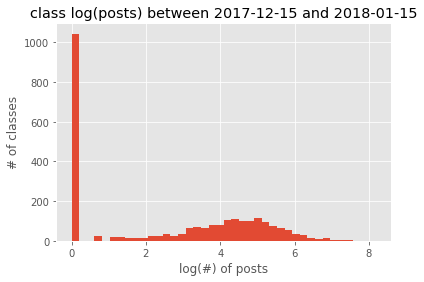

429215


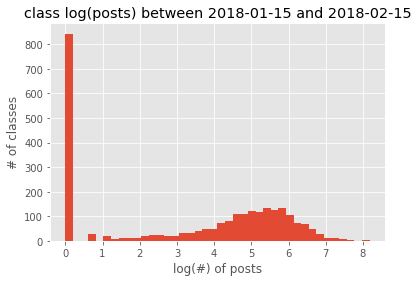

348676


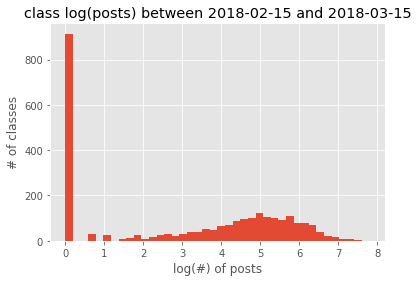

In [88]:
def plot_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    last_month_posts = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'class posts between {date1.date()} and {date2.date()}')
    ax.hist(last_month_posts_total['exists_last_month_posts'],bins=40)
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of posts")
    plt.show()
    
def plot_log_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    last_month_posts = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'class log(posts) between {date1.date()} and {date2.date()}')
    ax.hist(np.log(last_month_posts_total['exists_last_month_posts']+1),bins=40)
    ax.set_ylabel("# of classes")
    ax.set_xlabel("log(#) of posts")
    plt.show()
plot_posts_between(posts, pd.to_datetime("Jan 15 2018"), pd.to_datetime("Feb 15 2018"))
plot_log_posts_between(posts, pd.to_datetime("Dec 15 2017"), pd.to_datetime("Jan 15 2018"))
plot_log_posts_between(posts, pd.to_datetime("Jan 15 2018"), pd.to_datetime("Feb 15 2018"))
plot_log_posts_between(posts, pd.to_datetime("FEB 15 2018"), pd.to_datetime("March 15 2018"))

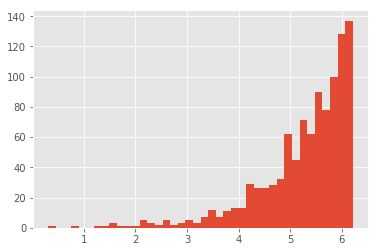

In [89]:
# testing a uniform distribution
import random
plt.hist(np.log([random.random()*500 for x in range(1015)]),bins=40);

In [91]:
date1, date2 = pd.to_datetime("Dec 15 2010"), pd.to_datetime("Jan 15 2011")
sum((date1 < posts['date']) & (posts['date'] < date2))

0

### Num of days (in last month) with > 0 posts

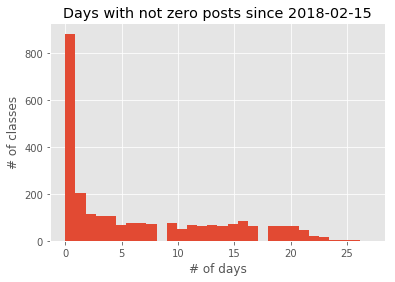

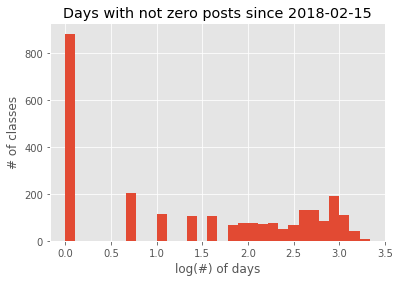

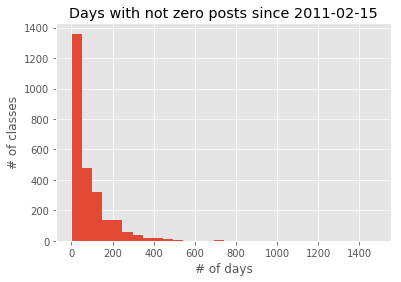

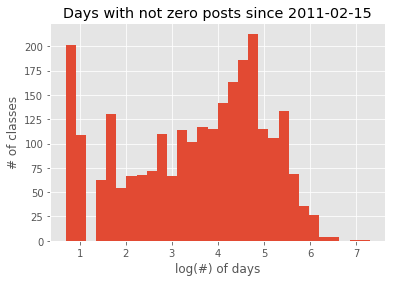

In [93]:
def plot_days_with_not_zero_posts_since(posts, date):
    days_one_post_in_last_month = posts[posts['date']> date].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'Days with not zero posts since {date.date()}')
    ax.hist(days_one_post_in_last_month['exists_days_one_post_in_last_month'],bins=30);
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of days")
    plt.show()
    
    
def plot_log_days_with_not_zero_posts_since(posts, date):
    days_one_post_in_last_month = posts[posts['date']> date].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'Days with not zero posts since {date.date()}')
    ax.hist(np.log(days_one_post_in_last_month['exists_days_one_post_in_last_month']+1),bins=30);
    ax.set_ylabel("# of classes")
    ax.set_xlabel("log(#) of days")
    plt.show()
    
plot_days_with_not_zero_posts_since(posts, pd.to_datetime("feb 15 2018"))
plot_log_days_with_not_zero_posts_since(posts, pd.to_datetime("feb 15 2018"))
plot_days_with_not_zero_posts_since(posts, pd.to_datetime("feb 15 2011"))
plot_log_days_with_not_zero_posts_since(posts, pd.to_datetime("feb 15 2011"))

In [ ]:
def plot_days_with_not_zero_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    days_one_post_in_last_month = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'Days with not zero posts between {date1.date()} and {date2.date()}')
    ax.hist(days_one_post_in_last_month['exists_days_one_post_in_last_month'],bins=30);
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of days")
    plt.show()
    
    
def plot_log_days_with_not_zero_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    days_one_post_in_last_month = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'Days with not zero posts between {date1.date()} and {date2.date()}')
    ax.hist(np.log(days_one_post_in_last_month['exists_days_one_post_in_last_month']+1),bins=30);
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of days")
    plt.show()
    
plot_days_with_not_zero_posts_between(posts, pd.to_datetime("Feb 15 2018"), pd.to_datetime("Feb 16 2018"))
plot_days_with_not_zero_posts_between(posts, pd.to_datetime("Jan 15 2018"), pd.to_datetime("Feb 15 2018"))
plot_log_days_with_not_zero_posts_between(posts, pd.to_datetime("Dec 15 2017"), pd.to_datetime("Jan 15 2018"))
plot_days_with_not_zero_posts_between(posts, pd.to_datetime("Jan 15 2018"), pd.to_datetime("Feb 15 2018"))
plot_log_days_with_not_zero_posts_between(posts, pd.to_datetime("FEB 15 2018"), pd.to_datetime("March 15 2018"))

## chart zero entry classes per month over time

In [ ]:
def posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    last_month_posts = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    return last_month_posts_total
    
def log_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    last_month_posts = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    last_month_posts_total['exists_last_month_posts'] = np.log(last_month_posts_total['exists_last_month_posts']+1)
    return last_month_posts_total
    
    
def plot_days_with_not_zero_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    days_one_post_in_last_month = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    return days_one_post_in_last_month
    
def plot_log_days_with_not_zero_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    days_one_post_in_last_month = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    days_one_post_in_last_month['exists_days_one_post_in_last_month'] = np.log(days_one_post_in_last_month['exists_days_one_post_in_last_month']+1)
    return days_one_post_in_last_month

In [ ]:
posts.groupby(pd.Grouper(freq="M"), as_index=False).count()

In [ ]:
# months = "jan, feb, mar, april, may, june, july, aug, sept, oct, nov, dec".split(',')
# for classroom_id in posts['classroom_id'].unique():
#     for year in range(2011,2018)
#         for i_month in range(months):
#             posts_between(posts, date1=pd.datetime(str(year) + months[i_month]), date2=)
#             plot_days_with_not_zero_posts_between(posts, date1, date2)

# Hearts

In [ ]:
sum(posts[posts['classroom_id']==4]['date']>pd.to_datetime('feb 15 2018'))

In [ ]:
sum(posts[posts['classroom_id']==4]['date']>pd.to_datetime('feb 15 2018'))

### in the last 90 days:
one <3 rewarded if:
1. the min of last three # posts/month is greater than 50
2. the min of last three # posts/month is greater than 200
3. the min of least month is greater than zero
4. the min of least WEEK is greater than zero (so one post every week) 
5. the least month is more than a fourth of the greatest month. (again, over the last three months)

In [ ]:
self.record_keeping_quantity_1 = month_min >= 50
self.record_keeping_quantity_2 = month_min >= 200
self.record_keeping_frequency_1 = month_min > 0
self.record_keeping_frequency_2 = week_min > 0
self.record_keeping_consistency = month_max && month_max < month_min * 4

# look at premade hearts

In [118]:
hearts = pd.read_csv('../data2/health_checks.csv')
hearts['date'] = pd.to_datetime(hearts['date'], errors='coerce')
hearts.head(3)

,school_id,classroom_id,date,score,record_keeping_quantity_1,record_keeping_quantity_2,record_keeping_frequency_1,record_keeping_frequency_2,record_keeping_usage,record_keeping_observations,record_keeping_consistency
0,58,133,2017-03-14,0,f,f,f,f,f,f,f
1,392,1201,2017-03-14,3,t,f,t,f,f,f,t
2,463,1427,2017-03-14,0,f,f,f,f,f,f,f


In [119]:
classrooms_merged.head(10)

,school_id,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id,children_per_post_aka_post_blast,lesson_id,post_per_lesson_aka_popularity
0,855,1281,f,Primary,NaT,2650,NaN,NaN,NaN,NaN,NaN,1281.0,18.0
1,48,126,t,Primary,2015-09-16,174,NaN,f,1.0,89168,NaN,126.0,78.0
2,48,126,t,Primary,2015-10-08,174,NaN,f,1.0,118933,2.0,126.0,78.0
3,48,126,t,Primary,2016-03-25,174,NaN,f,1.0,313583,4.0,126.0,78.0
4,48,126,t,Primary,2015-12-02,174,NaN,f,1.0,194688,2.0,126.0,78.0
5,48,126,t,Primary,2015-10-05,174,NaN,f,1.0,115274,2.0,126.0,78.0
6,48,126,t,Primary,2015-12-02,174,NaN,f,1.0,194683,3.0,126.0,78.0
7,48,126,t,Primary,2015-12-02,174,NaN,f,1.0,194684,2.0,126.0,78.0
8,48,126,t,Primary,2015-12-02,174,NaN,f,1.0,194685,2.0,126.0,78.0
9,48,126,t,Primary,2015-12-02,174,NaN,f,1.0,194686,2.0,126.0,78.0


In [120]:
hearts_merged = classrooms_merged.merge(hearts, how='left', left_on=['school_id','date'], right_on=['school_id','date'])

In [121]:
len(hearts_merged)

39118859

In [122]:
len(hearts)

1286143

In [123]:
len(classrooms_merged)

4585066

In [124]:
hearts_merged.columns

Index(['school_id', 'lesson_set_id', 'inactive', 'classroom_type', 'date',
       'classroom_id_x', 'picture_file_name', 'private', 'exists', 'post_id',
       'children_per_post_aka_post_blast', 'lesson_id',
       'post_per_lesson_aka_popularity', 'classroom_id_y', 'score',
       'record_keeping_quantity_1', 'record_keeping_quantity_2',
       'record_keeping_frequency_1', 'record_keeping_frequency_2',
       'record_keeping_usage', 'record_keeping_observations',
       'record_keeping_consistency'],
      dtype='object')

In [125]:
hearts_merged['classroom_id'] = hearts_merged['classroom_id_x']
hearts_merged = hearts_merged.drop('classroom_id_y', axis=1)
hearts_merged = hearts_merged.drop('classroom_id_x', axis=1)
hearts_merged.head(3)


,school_id,lesson_set_id,inactive,classroom_type,date,picture_file_name,private,exists,post_id,children_per_post_aka_post_blast,...,post_per_lesson_aka_popularity,score,record_keeping_quantity_1,record_keeping_quantity_2,record_keeping_frequency_1,record_keeping_frequency_2,record_keeping_usage,record_keeping_observations,record_keeping_consistency,classroom_id
0,855,1281,f,Primary,NaT,NaN,NaN,NaN,NaN,NaN,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2650
1,48,126,t,Primary,2015-09-16,NaN,f,1.0,89168,NaN,...,78.0,0.0,f,f,f,f,f,f,f,174
2,48,126,t,Primary,2015-09-16,NaN,f,1.0,89168,NaN,...,78.0,0.0,f,f,f,f,f,f,f,174


In [126]:
sum(pd.isna(hearts_merged['date']))

# sum(pd.isna(hearts_merged_cleaned_date['date']))

1228

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x216 with 2 Axes>

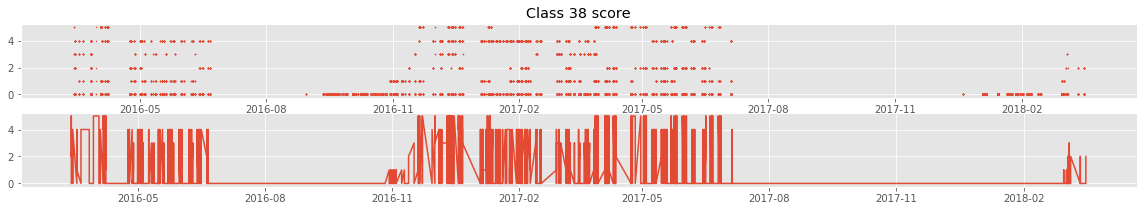

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x216 with 2 Axes>

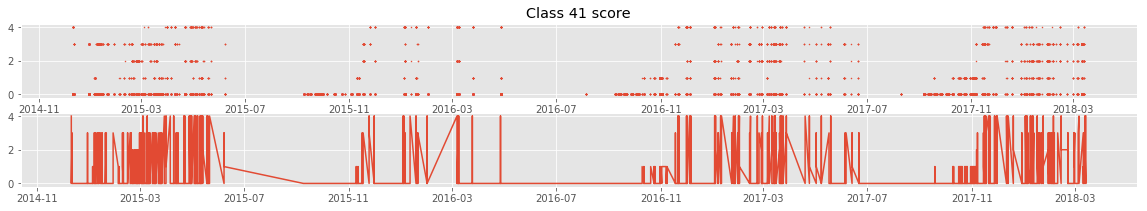

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x216 with 2 Axes>

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x216 with 2 Axes>

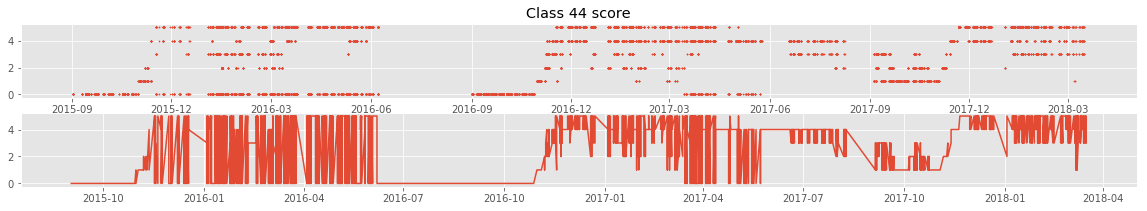

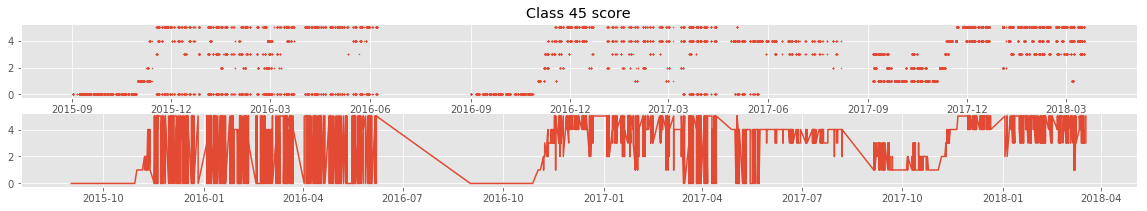

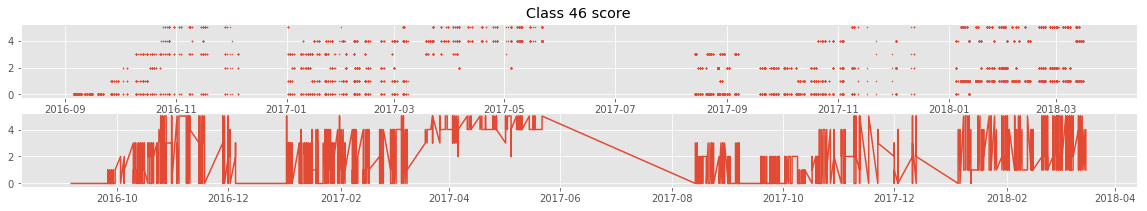

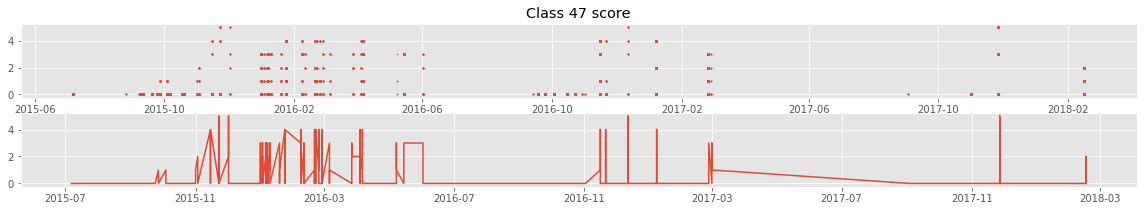

In [127]:
from autoregression import cleandata
hearts_merged_cleaned_date = cleandata.clean_df_respect_to_y(hearts_merged, 'date')

def plot_hearts(hearts_merged):
    for classroom_id in sum_post['classroom_id'].unique()[20:30]:
        fig, ax = plt.subplots(2,1, figsize=(20,3))
        ax.flatten()
        ax[0].scatter(hearts_merged[hearts_merged['classroom_id']==classroom_id]['date'].values,hearts_merged[hearts_merged['classroom_id']==classroom_id]['score'], s=1)
        ax[1].plot(hearts_merged[hearts_merged['classroom_id']==classroom_id].sort_values('date')['date'],hearts_merged[hearts_merged['classroom_id']==classroom_id].sort_values('date')['score']);
        ax[0].set_title(f"Class {classroom_id} score")

    #     ax[0].get_xaxis().set_label_coords(2011,2019)
    #     ax[1].get_xaxis().set_label_coords(2011,2019)
    #     x0, x1 = ax[0].xaxis.label.get_position()
    #     print(x0, x1)
    # #     ax[1].xaxis.label.set_position([x0, x1])
    # #     ax[1].xaxis._autolabelpos=False
    #     ax[0].set_xticks([pd.to_datetime(x0),pd.to_datetime(x1)])
    #     ax[1].set_xticks([pd.to_datetime(x0),pd.to_datetime(x1)])
        plt.show()
plot_hearts(hearts_merged_cleaned_date)

# make non-zero monthly groupings

In [98]:
posts['year_month'] = pd.to_datetime(posts['date']).map(lambda dt: dt.replace(day=1))
posts.groupby(['classroom_id','year_month']).count().head(3)

id  date  picture_file_name  private  exists
classroom_id year_month                                               
1            2011-12-01   16    16                 16       16      16
             2012-01-01  167   167                 71      167     167
             2012-02-01  262   262                 93      262     262

In [99]:
class_month_posts = posts.pivot_table(index='classroom_id', 
                     columns='year_month', 
                     values='exists',
                     fill_value=0, 
                     aggfunc='count').unstack()
class_month_posts.head(3)

year_month  classroom_id
1908-10-01  1               0
            3               0
            4               0
dtype: int64

In [100]:
# pretty good so far, but I want those zeros
class_month_posts = posts.pivot_table(index='year_month',
                     columns='classroom_id', 
                     values='exists',
                     fill_value=0, 
                     aggfunc='count').unstack()
class_month_posts.head(3)

classroom_id  year_month
1             1908-10-01    0
              1917-01-01    0
              1917-03-01    0
dtype: int64

In [101]:
for classroom_id in class_month_posts['classroom_id'].unique()[0:10]:
    fig, ax = plt.subplots(2,1, figsize=(20,3))
    ax.flatten()
    ax[0].scatter(class_month_posts[class_month_posts['classroom_id']==classroom_id]['date'].values,class_month_posts[class_month_posts['classroom_id']==classroom_id]['exists'], s=1)
    ax[1].plot(class_month_posts[class_month_posts['classroom_id']==classroom_id].sort_values('date')['date'],class_month_posts[class_month_posts['classroom_id']==classroom_id].sort_values('date')['exists']);
    ax[0].set_title(f"Class {classroom_id} score")

KeyError: 'classroom_id'

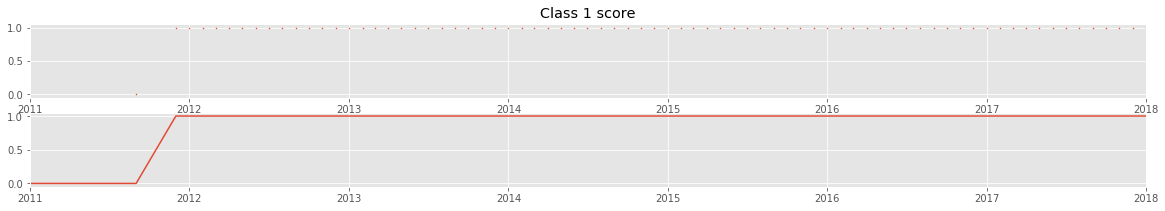

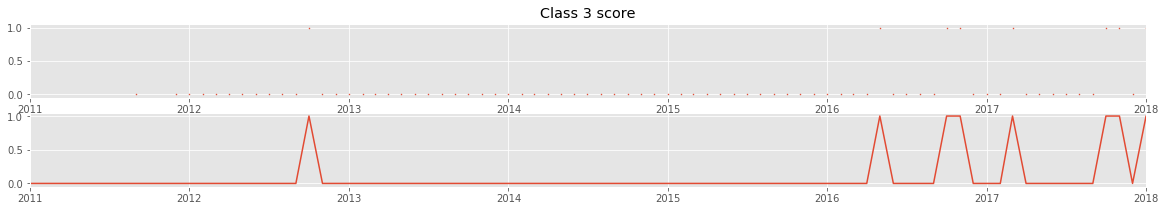

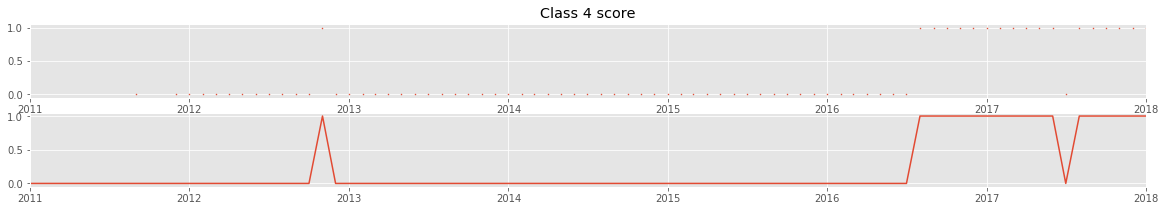

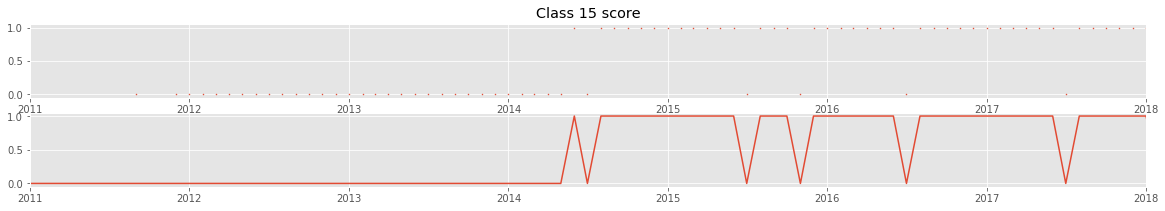

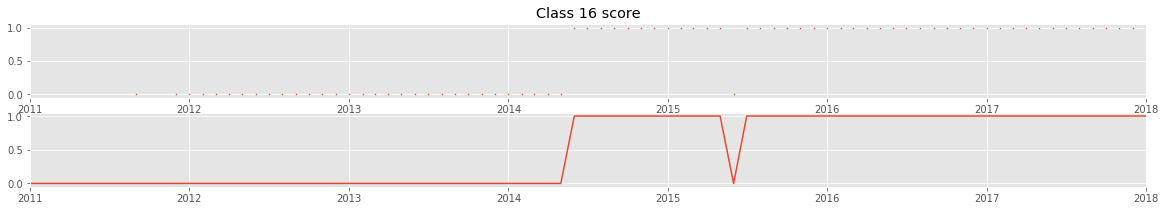

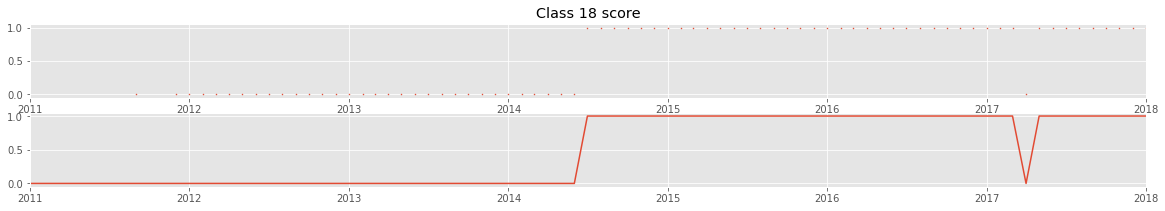

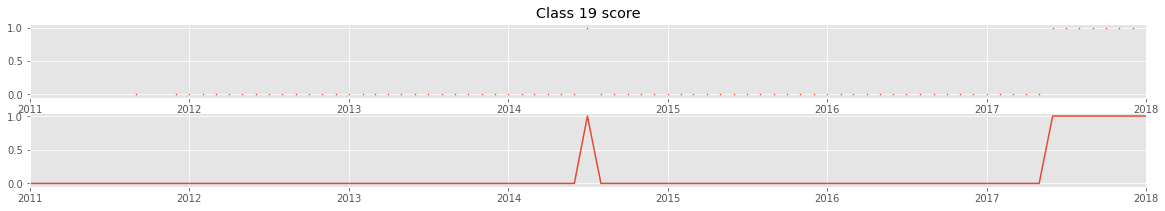

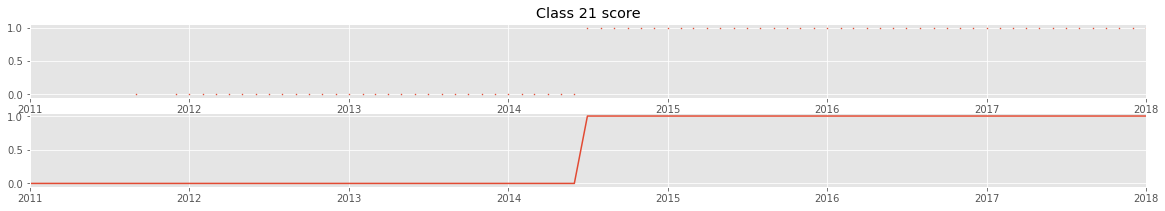

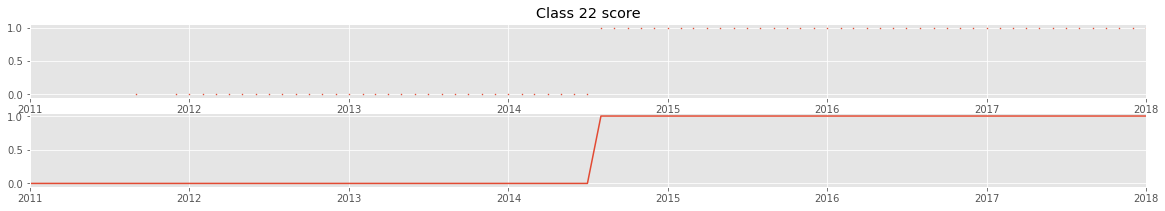

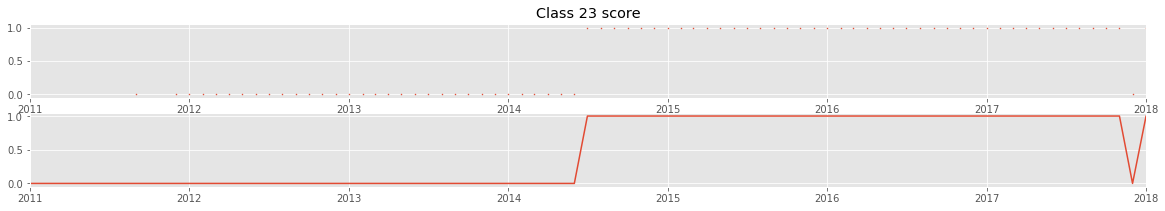

In [51]:
for classroom_id in list(class_month_posts.index.get_level_values(0).unique())[0:10]:
    fig, ax = plt.subplots(2,1, figsize=(20,3))
    ax.flatten()
    dates = np.array(class_month_posts[classroom_id].index)
    current_monthly_posts = class_month_posts[classroom_id].values
    ax[0].scatter(dates, current_monthly_posts>0, s=1)
    ax[1].plot(dates, current_monthly_posts>0)
#     ax[1].plot(class_month_posts[class_month_posts['classroom_id']==classroom_id].sort_values('date')['date'],class_month_posts[class_month_posts['classroom_id']==classroom_id].sort_values('date'));
    ax[0].set_title(f"Class {classroom_id} score")
    ax[0].set_xlim("2011","2018")
    ax[1].set_xlim("2011","2018")
    plt.show()

Int64Index([   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            ...
            3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862, 3862],
           dtype='int64', name='classroom_id', length=230510)

In [52]:
sessions.head(3)

,id,current,start_date,stop_date,name,school_id,inactive,exists
0,1,f,2012-01-03,2012-06-20,2011-12,2,f,1
1,2,f,2012-06-25,2012-08-17,Summer 2012,2,f,1
2,6,f,2013-09-01,2014-07-01,2013-14,3,f,1


In [ ]:
sessions.groupby('school_id', 'stop_date').count()

In [74]:
continued_accounts = (sessions.groupby('school_id').agg({'stop_date' : [np.max]}) > pd.to_datetime("march 2018")).sum()

In [75]:
total_accounts = len(sessions.groupby('school_id').agg({'stop_date' : [np.max]}) > pd.to_datetime("march 2018"))

In [78]:
sessions.groupby('school_id').agg({'stop_date' : [np.max]}) > pd.to_datetime("march 2018")

,stop_date
,amax
school_id,
2,True
3,True
7,True
8,True
10,False
11,True
12,True
13,True


# make y_hat creator function

In [ ]:
# for each classroom make a set of data, per total history, warning about use decay. 
# then scan this function forward in time
# function that aggregates the data 6 months in the future (zero use to start)
# a function that keeps track of aggregated child/teacher/image/post stats over each month ago
# LATER function that has a coeff for alllll the history timeseries data, 